# Import the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'Dataset\data.csv')
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [4]:
df=df.drop('ID',axis=1)

## Exploratory Data Analysis

In [5]:
df['is_hispanic'].value_counts()

is_hispanic
 All other                    180404
 Mexican-American               8509
 Mexican (Mexicano)             7614
 Central or South American      4176
 Puerto Rican                   3435
 Other Spanish                  2612
 Cuban                          1231
 NA                              882
 Chicano                         331
 Do not know                     305
Name: count, dtype: int64

In [6]:
df.shape

(209499, 42)

In [7]:
df.columns.values

array(['age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'], dtype=object)

In [8]:
df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [9]:
df.describe(include='O').T

,count,unique,top,freq
gender,209499,2,Female,108784
education,209499,17,High school graduate,50627
class,104254,8,Private,75617
education_institute,13302,2,High school,7247
marital_status,209499,7,Never married,90723
race,209499,5,White,175709
is_hispanic,209499,10,All other,180404
employment_commitment,209499,8,Children or Armed Forces,129789
unemployment_reason,6520,5,Other job loser,2242
is_labor_union,20079,2,No,16968


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             209499 non-null  int64  
 1   gender                          209499 non-null  object 
 2   education                       209499 non-null  object 
 3   class                           104254 non-null  object 
 4   education_institute             13302 non-null   object 
 5   marital_status                  209499 non-null  object 
 6   race                            209499 non-null  object 
 7   is_hispanic                     209499 non-null  object 
 8   employment_commitment           209499 non-null  object 
 9   unemployment_reason             6520 non-null    object 
 10  employment_stat                 209499 non-null  int64  
 11  wage_per_hour                   209499 non-null  int64  
 12  is_labor_union  

In [11]:
df.isna().sum().reset_index()

,index,0
0,age,0
1,gender,0
2,education,0
3,class,105245
4,education_institute,196197
5,marital_status,0
6,race,0
7,is_hispanic,0
8,employment_commitment,0
9,unemployment_reason,202979


In [12]:
df['income_above_limit'].value_counts() #the target feature

income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

<Axes: xlabel='income_above_limit', ylabel='count'>

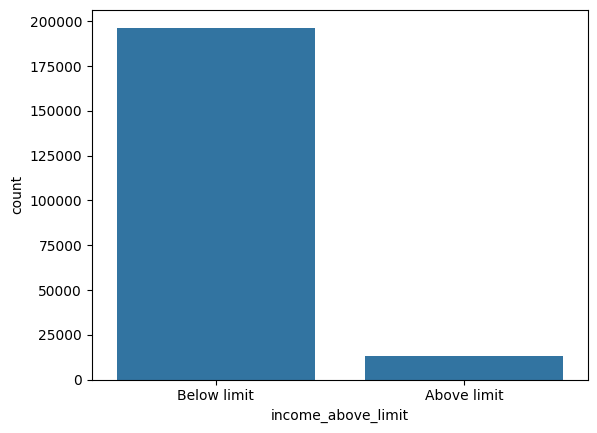

In [13]:
sns.countplot(x=df['income_above_limit']) # the imbalance in the target variable

In [14]:
for col in df.columns.values:
    print(col,df[col].unique(),'\n\n')  #print all the unique values each column has

age [79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87] 


gender [' Female' ' Male'] 


education [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 


class [nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Without pay' ' Never worked'] 


education_institute [nan ' High sc

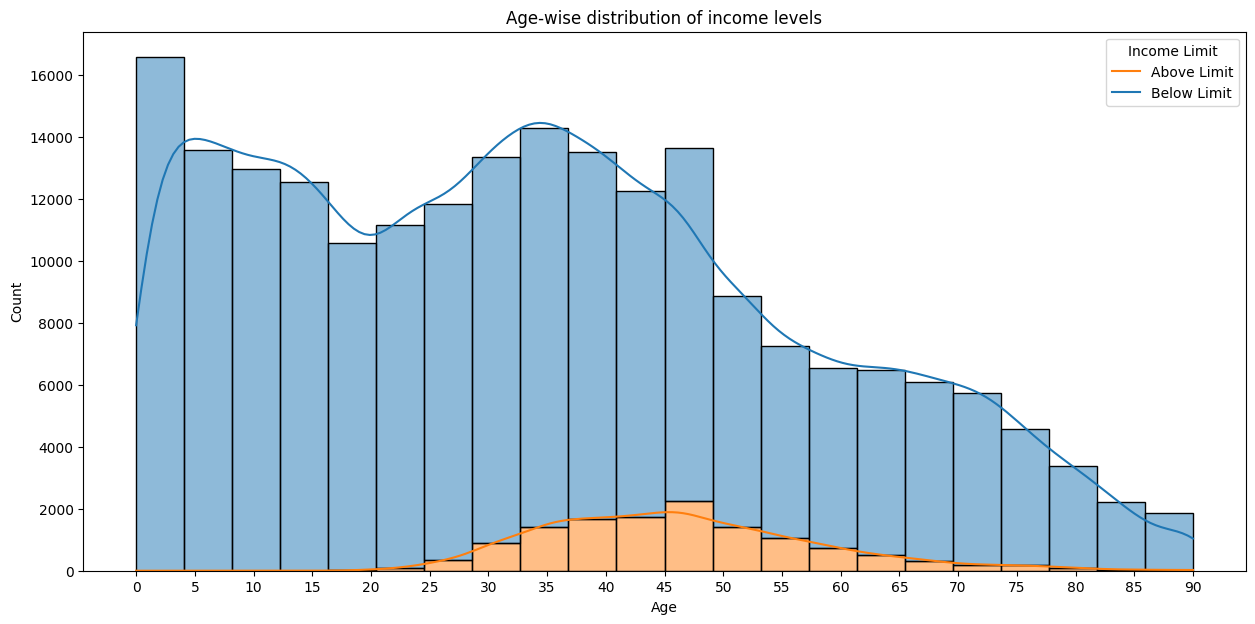

In [15]:
plt.figure(figsize=(15,7))
sns.histplot(data = df,x='age',hue='income_above_limit',multiple='stack',kde=True,bins=22,legend=True)
plt.xticks(np.arange(0,95,5))
plt.xlabel('Age')
plt.legend(['Above Limit','Below Limit'],title='Income Limit')
plt.title('Age-wise distribution of income levels')
plt.show()

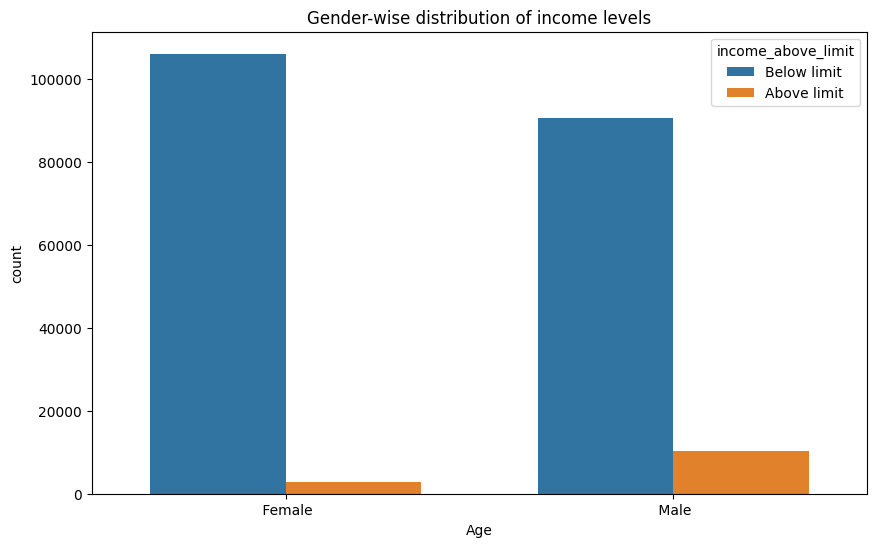

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data = df,x='gender',hue='income_above_limit',width=0.7)
plt.xlabel('Age')
plt.title('Gender-wise distribution of income levels')
plt.show()

In [17]:
df.columns.values

array(['age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'], dtype=object)

In [30]:
cols = ['education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'is_labor_union','industry_code_main', 'occupation_code_main']

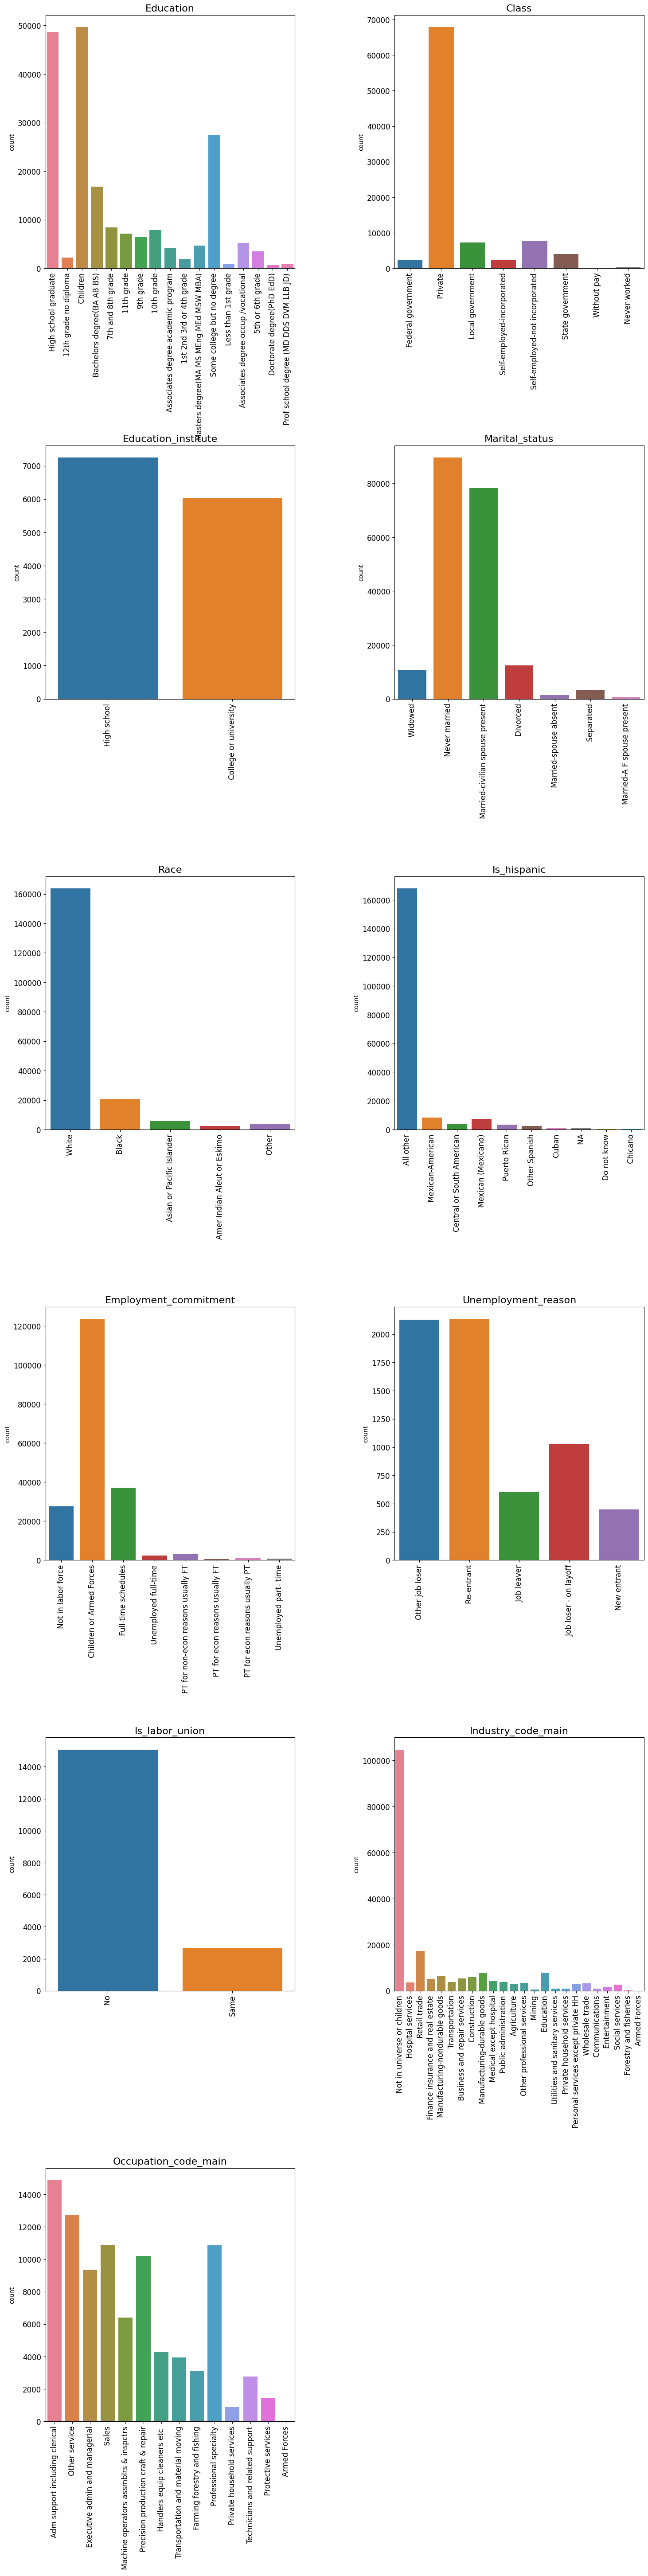

In [36]:
ss=0
plt.figure(figsize=(15,80))
for i in cols:
    ss+=1
    plt.subplot(7,2,ss)
    sns.countplot(x=i,data=df[df['income_above_limit']=='Below limit'],hue=i,legend=False)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i.capitalize(),fontsize=16)
    plt.xlabel(None)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

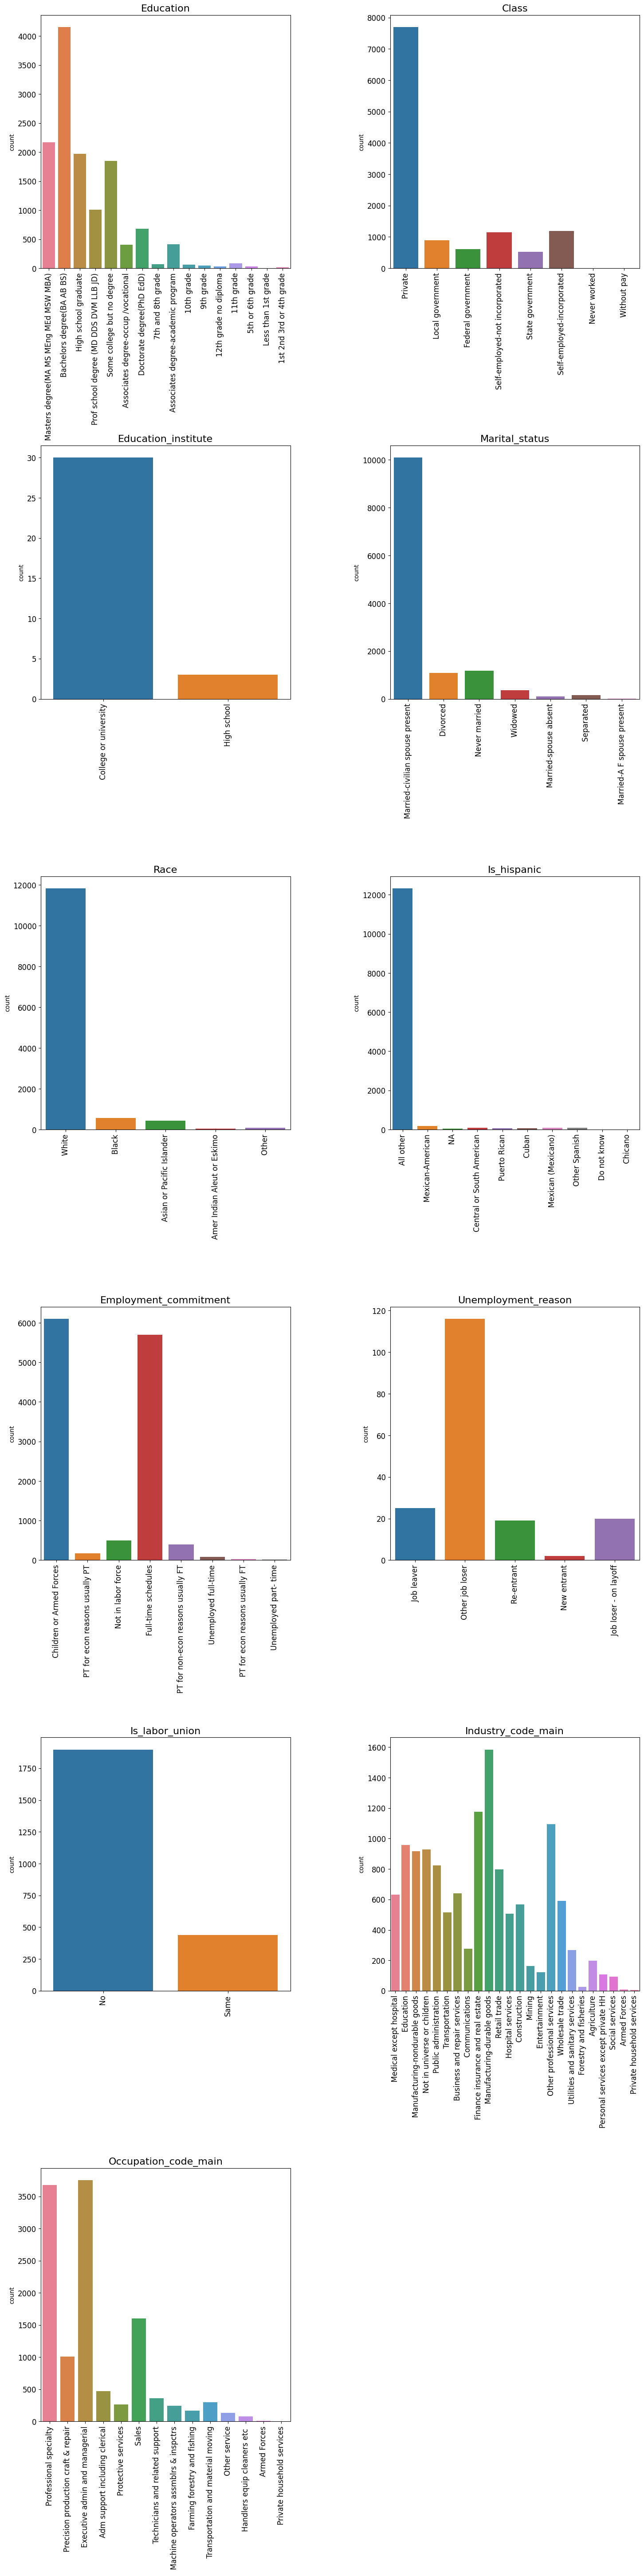

In [37]:
ss=0
plt.figure(figsize=(15,80))
for i in cols:
    ss+=1
    plt.subplot(7,2,ss)
    sns.countplot(x=i,data=df[df['income_above_limit']=='Above limit'],hue=i,legend=False)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i.capitalize(),fontsize=16)
    plt.xlabel(None)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()